<a href="https://colab.research.google.com/github/JungMinNoh/jungminnoh/blob/master/LSTM_2%EC%B8%B5_%EC%8C%93%EA%B8%B0_14108334_%EB%85%B8%EC%A0%95%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
try:

    %tensorflow_version 2.x  # %tensorflow_version only exists in Colab

except Exception:

    pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [4]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

#수정한 코드 (2층)

기존 model_lstm.add(LSTM(8)) 명령어에서
model_lstm.add(LSTM(8,return_sequences=True,
               input_shape=(timesteps, data_dim))) 로 바꿔줌.

In [6]:
# expected input data shape: (batch_size, timesteps, data_dim)

model_lstm = Sequential()

data_dim = 16
timesteps = 8
num_classes = 10

model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8,return_sequences=True,
               input_shape=(timesteps, data_dim)))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, None, 8)           1312      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 33,865
Trainable params: 33,865
Non-trainable params: 0
_________________________________________________________________


# LSTM 다층 쌓기 구조 예시

그림 예시.

![대체 텍스트](https://keras.io/img/regular_stacked_lstm.png)

이 모델에서는 3개의 LSTM 레이어를 서로 위에 쌓아서 상위 레벨의 시간 표현을 학습할 수 있는 모델을 만든다.

처음 두 LSTM은 전체 출력 시퀀스를 반환하지만 마지막 한 개는 출력 시퀀스의 마지막 단계만 반환하므로 시간적 치수(즉, 입력 시퀀스를 단일 벡터로 변환)가 떨어진다.

In [0]:
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 적용

In [0]:
from tensorflow.keras.datasets import imdb
(x_train_all, y_train_all), (x_test, y_test)=imdb.load_data(skip_top=20, num_words=1000)
# 앞과 마찬가지로 단어 1000개

for i in range(len(x_train_all)):
  x_train_all[i]=[w for w in x_train_all[i] if w>2]

import numpy as np
np.random.seed(42)
random_index=np.random.permutation(25000)

x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]


17465344/17464789 [==============================] - 1s 0us/step


In [0]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [0]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 원-핫 인코딩 적용하지 않음
history=model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 55s 3ms/sample - loss: 0.4586 - accuracy: 0.7901 - val_loss: 0.3894 - val_accuracy: 0.8304
Epoch 2/10
20000/20000 [==============================] - 51s 3ms/sample - loss: 0.3387 - accuracy: 0.8565 - val_loss: 0.3545 - val_accuracy: 0.8496
Epoch 3/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.3102 - accuracy: 0.8680 - val_loss: 0.3536 - val_accuracy: 0.8472
Epoch 4/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.2917 - accuracy: 0.8749 - val_loss: 0.3711 - val_accuracy: 0.8396
Epoch 5/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.2746 - accuracy: 0.8860 - val_loss: 0.3608 - val_accuracy: 0.8390
Epoch 6/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.2574 - accuracy: 0.8929 - val_loss: 0.3645 - val_accuracy: 0.8354
Epoch 7/10
20000/20000 [==============================] -

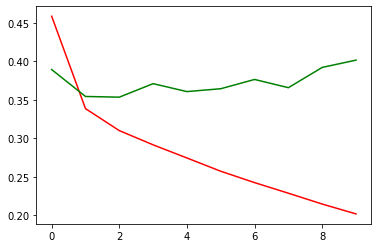

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.show()

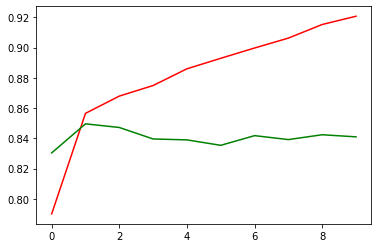

In [0]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')
plt.show()

In [0]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0) 
print(accuracy)

0.841


**결론 : 정확도가 1층 LSTM에서 0.8374였는데 2층으로 쌓았을땐 0.841로 올랐음을 볼 수 있다.**

https://keras.io/getting-started/sequential-model-guide/

Stacked LSTM for sequence classification 부분 참조.